In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./summer_movies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           905 non-null    object 
 1   title_type       905 non-null    object 
 2   primary_title    905 non-null    object 
 3   original_title   905 non-null    object 
 4   year             904 non-null    float64
 5   runtime_minutes  849 non-null    float64
 6   genres           887 non-null    object 
 7   simple_title     905 non-null    object 
 8   average_rating   905 non-null    float64
 9   num_votes        905 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 70.8+ KB


In [4]:
df[df.isna().any(axis = 1)]

,tconst,title_type,primary_title,original_title,year,runtime_minutes,genres,simple_title,average_rating,num_votes
113,tt0084328,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,1982.0,NaN,"Comedy,Fantasy",a midsummer nights dream,7.8,105
167,tt0102907,movie,Summer of the Lion Kings,Shishiohtachi no natsu,1991.0,107.0,NaN,summer of the lion kings,4.7,11
175,tt0107496,movie,Malibu Summer,Malibu Summer,1993.0,NaN,NaN,malibu summer,4.3,46
190,tt0116686,movie,Japanese Summers of a Filipino Fundoshi,Japanese Summers of a Filipino Fundoshi,1996.0,NaN,Documentary,japanese summers of a filipino fundoshi,6.2,11
221,tt0168198,movie,Summer Lightning,Summer Lightning,1985.0,NaN,"Drama,Romance",summer lightning,6.9,11
...,...,...,...,...,...,...,...,...,...,...
854,tt7149192,tvMovie,The Summer of Love,The Summer of Love,2017.0,NaN,"Documentary,History,Music",the summer of love,6.3,36
864,tt7481324,movie,Summer Holidays,Ta'tilat-e tabestani,1996.0,NaN,NaN,summer holidays,5.1,18
887,tt8730658,movie,"Summer Soul, Sunshine Patriot, and the America...","Summer Soul, Sunshine Patriot, and the America...",2008.0,NaN,Documentary,summer soul sunshine patriot and the american ...,9.0,16
891,tt9013026,movie,This Guest of Summer,This Guest of Summer,NaN,NaN,Horror,this guest of summer,7.9,179


In [5]:
df = df.fillna('Not given')

In [6]:
df.isna().sum()

tconst             0
title_type         0
primary_title      0
original_title     0
year               0
runtime_minutes    0
genres             0
simple_title       0
average_rating     0
num_votes          0
dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,average_rating,num_votes
count,905.000000,905.000000
mean,6.273702,2296.285083
std,1.245414,20630.393488
min,2.300000,10.000000
25%,5.600000,34.000000
50%,6.400000,119.000000
75%,7.100000,517.000000
max,9.800000,564894.000000


In [9]:
df.to_csv('./summer_movies_cleaningdata.csv')

In [233]:
df_rating_score = df.groupby('year')['average_rating'].mean().reset_index(name = 'avg_score_per_year')

In [234]:
df_rating_score = df_rating_score[~(df_rating_score['year'] == 'Not given')]

In [235]:
df_rating_score.head()

,year,avg_score_per_year
0,1920.0,7.4
1,1928.0,4.3
2,1935.0,6.8
3,1941.0,5.5
4,1944.0,6.3


Text(0.5, 1.0, 'Average rating scores of movies through years')

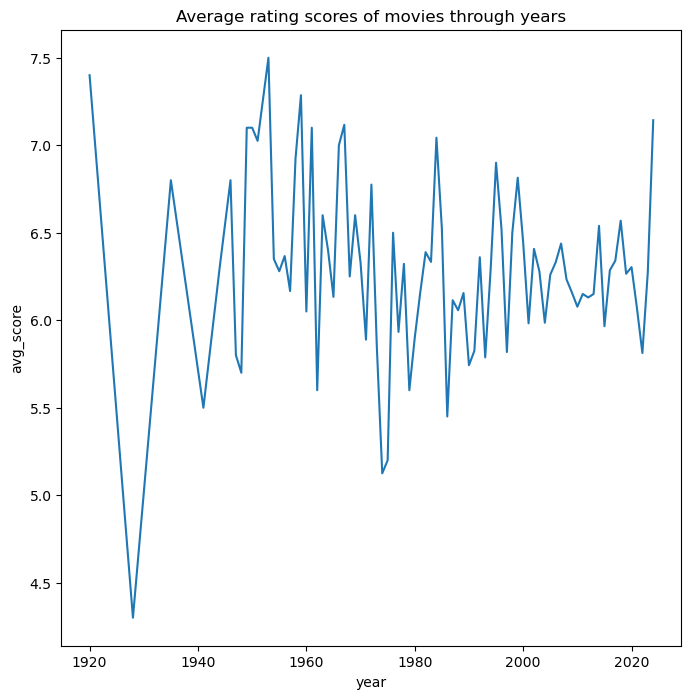

In [236]:
y = df_rating_score.loc[:,'avg_score_per_year']
x = df_rating_score.loc[:,'year']
plt.figure(figsize = (8,8))
plt.plot(x,y)
plt.ylabel('avg_score')
plt.xlabel('year')
plt.title('Average rating scores of movies through years')


In [237]:
df[['original_title','average_rating']].sort_values(by = 'average_rating',ascending = False).head(5)

,original_title,average_rating
554,Summer Nude '13: Making Movie,9.8
653,Summer Intensive,9.4
747,Kasabian Summer Solstice,9.4
886,Endless Summer: 30 Years of Home and Away,9.2
617,A Midsummer Night's Dream,9.1


In [238]:
df['genres'] = df['genres'].str.split(',').str[0]

In [239]:
df_genres =df.groupby('genres')['num_votes'].sum().reset_index(name = 'N')

In [240]:
df_genres = df_genres.drop([15]) 

In [241]:
df1 = df_genres.sort_values(by = 'N',ascending = False).head(10)

In [242]:
df1['N'] = df1['N'] / df1['N'].sum() *100

In [243]:
df1.head()

,genres,N
4,Comedy,48.087999
7,Drama,18.330003
11,Horror,15.365732
1,Adventure,9.307136
5,Crime,4.057721


Text(0.5, 1.0, 'Top 10 movie genres being voted in summer')

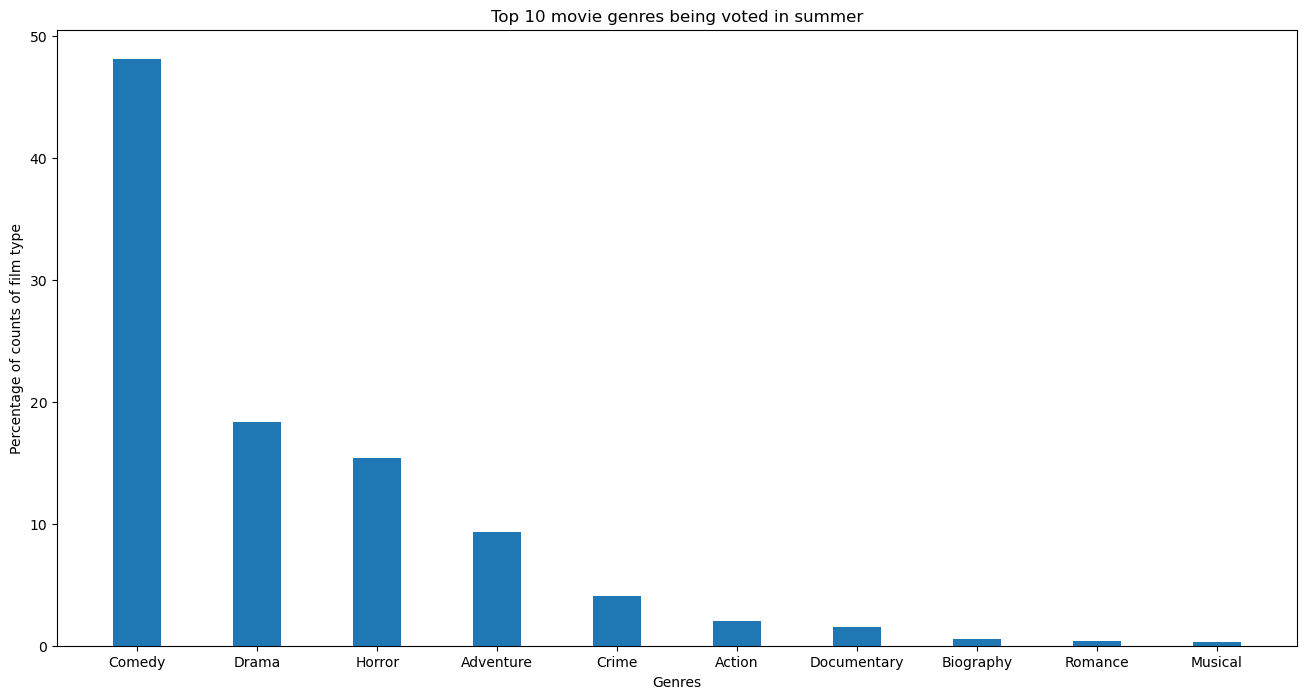

In [244]:
plt.figure(figsize = (16,8))
x = df1.loc[:,'genres']
y = df1.loc[:,'N']
plt.bar(x,y,width = 0.4)
plt.xlabel('Genres')
plt.ylabel('Percentage of counts of film type')
plt.title('Top 10 movie genres being voted in summer')


C:\Users\tuyet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tuyet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


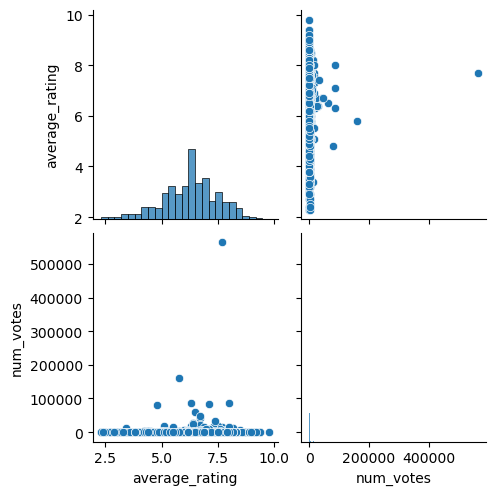

In [245]:
sns.pairplot(df)

Text(0.5, 1.0, 'The distribution of average rating')

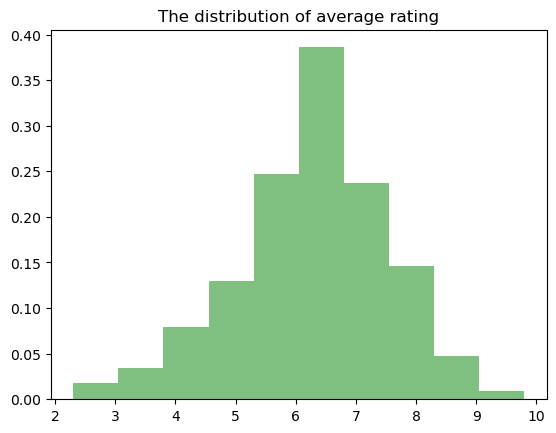

In [246]:
plt.hist(df['average_rating'],density = True, alpha = 0.5, color = 'green')
plt.title('The distribution of average rating')

In [247]:
df_t = df.groupby('runtime_minutes').size()

In [248]:
df_t = df_t.drop('Not given')

In [249]:
df2 = df_t.sort_values(ascending = False).head(5)

In [250]:
df2.head()

runtime_minutes
90.0    62
95.0    35
80.0    32
98.0    32
85.0    31
dtype: int64

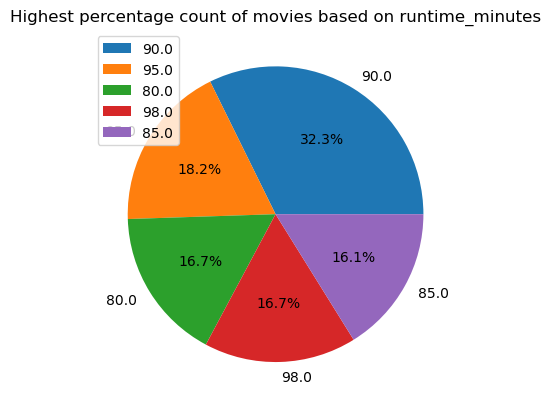

In [251]:
df2.plot.pie(autopct='%.1f%%')
plt.title('Highest percentage count of movies based on runtime_minutes')
plt.legend()
plt.show()